# <span style="color:red">ESERCITAZIONE 11 </span>

## <span style="color:blue">ESERCIZIO 11.1</span>


Inizialmente, si è provato ad effettuare il fit lineare con solamente 100 dati di training e 10 di validation e ponendo $N_{epochs}=5$. I risultati ottenuti non sono stati per nulla soddisfacenti.

Si è deciso allora di aumentare il numero di epoche a $N_{epochs}=30$.

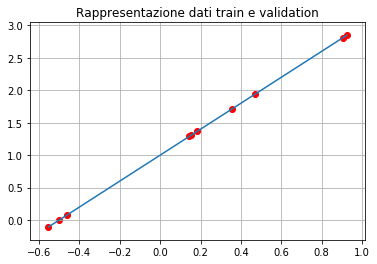

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 0s 20ms/step - loss: 1.3054 - val_loss: 1.6246
Epoch 2/30
4/4 [==============================] - 0s 11ms/step - loss: 1.1797 - val_loss: 1.4535
Epoch 3/30
4/4 [==============================] - 0s 10ms/step - loss: 1.0545 - val_loss: 1.3121
Epoch 4/30
4/4 [==============================] - 0s 11ms/step - loss: 0.9515 - val_loss: 1.1863
Epoch 5/30
4/4 [==============================] - 0s 12ms/step - loss: 0.8600 - val_loss: 1.0513
Epoch 6/30
4/4 [==============================] - 0s 11ms/step - loss: 0.7641 - val_loss: 0.9634
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 0

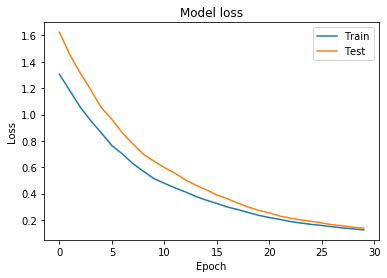

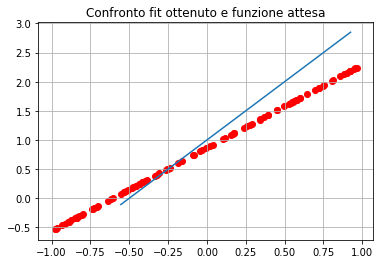

In [7]:
m = 2 
b = 1

import numpy as np

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b 

sigma = 0.0 
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.title("Rappresentazione dati di validation e target")
plt.grid(True); plt.show()


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse')

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

print()
print(model.get_weights())
print()

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.title("Confronto fit ottenuto e funzione attesa")
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

I risultati così ottenuti non migliorano significativamente. Si può osservare dall'ultimo grafico, infatti, che la pendenza della retta risultante dal fit è ben distante da $m=2$.

In realtà, provando a lanciare più volte questo stesso programma, può accadere che la retta di best-fit somigli alla $f(x)=2x+1$. Tuttavia, non ci si può certo accontentare di ottenere ogni tanto dei buoni risultati. Si sta cercando di costruire un'intelligenza artificiale che riesca sempre a produrre un fit adeguato.  

Si decide, allora, di aumentare i dati di training a $500$ e quelli di vaditation a $50$. Il numero di epoche è stato tenuto fisso a $30$.

Epoch 1/30
16/16 [==============================] - 0s 6ms/step - loss: 1.3943 - val_loss: 1.0470
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.9019 - val_loss: 0.6888
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6114 - val_loss: 0.4719
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4308 - val_loss: 0.3374
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3155 - val_loss: 0.2492
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2373 - val_loss: 0.1880
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1817 - val_loss: 0.1449
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1416 - val_loss: 0.1129
Epoch 9/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1114 - val_loss: 0.0890
Epoch 10/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0882 - val_loss: 0.0704
Epoch 11/30
16/16 [

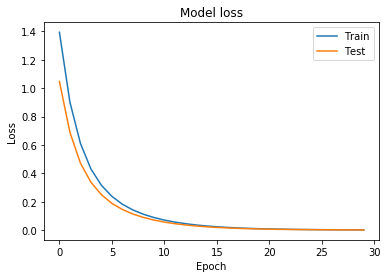

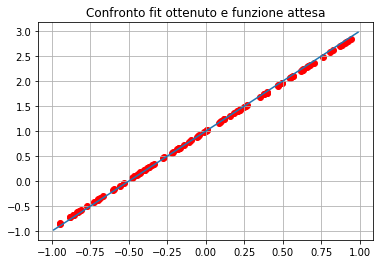

In [9]:
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b 

sigma = 0.0 
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse')

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

print()
print(model.get_weights())
print()

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.title("Confronto fit ottenuto e funzione attesa")
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Osservando il valore della loss e l'ultimo grafico, si conclude che questo fit è decisamente migliore. Questo risultato non deve sorprendere: maggiore è il numero dei dati su cui l'intelligenza artificiale può esercitarsi, migliori sono i risultati prodotti.

Finora si sono utilizzati dei dati privi di rumore gaussiano. Si è posta allora $\sigma=0.2$. Utilizzando gli stessi parametri precedenti, si giunge, anche in questo caso, a dei risultati piuttosto discordanti: in alcuni casi il fit rimaneva estremamente buono; in altri, invece, i parametri $m$ e $b$ ottenuti differivano da quelli attesi quasi del $10\%$.

Per risolvere questo problema si sono aumentati ulteriormente i dati: sono stati raddoppiati sia quelli di training che quelli di validation. 

Epoch 1/30
32/32 [==============================] - 0s 3ms/step - loss: 2.7212 - val_loss: 1.6397
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 1.5692 - val_loss: 0.9835
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.9613 - val_loss: 0.6230
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6131 - val_loss: 0.4082
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4018 - val_loss: 0.2749
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2700 - val_loss: 0.1901
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1859 - val_loss: 0.1359
Epoch 8/30
32/32 [==============================] - 0s 3ms/step - loss: 0.1327 - val_loss: 0.1017
Epoch 9/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0988 - val_loss: 0.0801
Epoch 10/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0773 - val_loss: 0.0663
Epoch 11/30
32/32 [

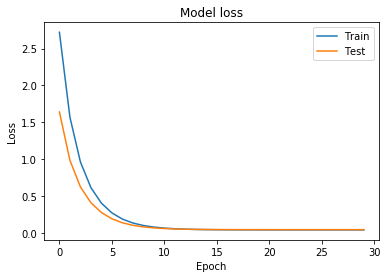

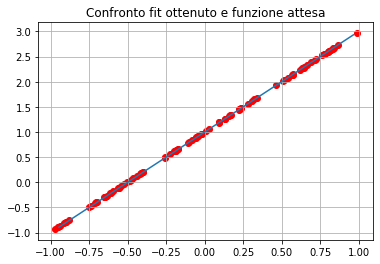

In [13]:
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b 

sigma = 0.2 
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse')
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

print()
print(model.get_weights())
print()
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss (con y_valid):', score)

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss (con y_target):', score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.title("Confronto fit ottenuto e funzione attesa")
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Si nota che il fit ottenuto è estremamente preciso, nonostante l'introduzione della sigma. Il valore della loss, calcolata con i dati di validation, è superiore rispetto ai precedenti casi in cui $\sigma=0$. Ciò non deve sorprendere: con l'introduzione del rumore nemmeno gli stessi dati sono perfettamente aderenti con la $f(x)$. Al contrario, la loss valutata sui dati target (sempre privi di rumore) rimane estremamente bassa.

Si prova, infine, ad aumentare ulteriormente $\sigma$, ponendola pari a $0.5$ 

Epoch 1/30
32/32 [==============================] - 0s 3ms/step - loss: 1.4796 - val_loss: 1.0157
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.8216 - val_loss: 0.6016
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5585 - val_loss: 0.4230
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4307 - val_loss: 0.3378
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3607 - val_loss: 0.2931
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3190 - val_loss: 0.2687
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2924 - val_loss: 0.2544
Epoch 8/30
32/32 [==============================] - 0s 3ms/step - loss: 0.2754 - val_loss: 0.2471
Epoch 9/30
32/32 [==============================] - 0s 4ms/step - loss: 0.2645 - val_loss: 0.2434
Epoch 10/30
32/32 [==============================] - 0s 4ms/step - loss: 0.2570 - val_loss: 0.2419
Epoch 11/30
32/32 [

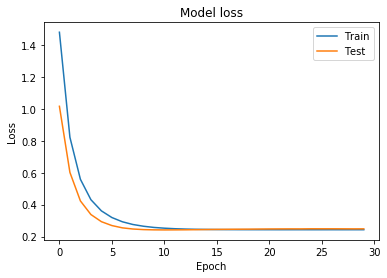

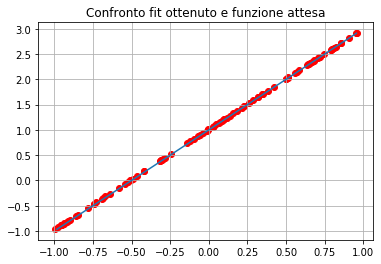

In [15]:
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b 

sigma = 0.5 
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse')
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

print()
print(model.get_weights())
print()
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss (con y_valid):', score)

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss (con y_target):', score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title("Confronto fit ottenuto e funzione attesa")
plt.grid(True)
plt.show()

Anche in questo caso si riesce a ottenere un ottimo fit. Come previsto, la loss calcolata con i dati di validazione è cresciuta ancora, mentre quella ottenuta con i target è rimasta notevolmente inferiore.

Si può quindi essere soddisfatti di queste prime sperimentazioni con il machine learning: con valori adeguati di epoche e di dati si sono ottenuti risultati estremamente buoni, anche introducendo del rumore nei dati.

## <span style="color:blue">ESERCIZIO 11.2</span>

Per fittare una funzione non lineare sono necessari maggiori accorgimenti. Innanzitutto un singolo neurone non può essere sufficiente, occorre introdurre layer intermedi tra quello di input e quello di output. Bisogna utilizzare, inoltre, le funzioni di attivazioni per i neuroni. Se non si specifica nulla, infatti, la macchina continuerà ad essere utilizzata quella di default, che però non è più adeguata.

In una prima istanza si è introdotto un layer intermedio di $40$ neuroni. Per tutti questi e per il neurone di input si è utilizzata la funzione di attivazione "relu". Per quello di output, invece, in questo e in tutti i programmi successivi, si è tenuta l'attivazione di default. Si sono utilizzati $5000$ dati di training e $500$ di validation: ci si aspetta che, per questo tipo di fit, siano necessari molti più dati rispetto al precedente esercizio dal momento che la $f(x)$ non è più una semplice retta. Si è lasciato $N_{epochs}=30$ e, per il momento, $\sigma=0$.

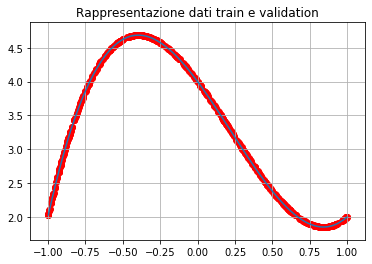

Epoch 1/30
16/16 [==============================] - 0s 7ms/step - loss: 8.0997 - val_loss: 4.2653
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 3.0391 - val_loss: 1.9737
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 1.7038 - val_loss: 1.4300
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 1.2696 - val_loss: 1.1218
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.9944 - val_loss: 0.8944
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7816 - val_loss: 0.7026
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6025 - val_loss: 0.5466
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4639 - val_loss: 0.4372
Epoch 9/30
16/16 [==============================] - 0s 4ms/step - loss: 0.3727 - val_loss: 0.3753
Epoch 10/30
16/16 [==============================] - 0s 4ms/step - loss: 0.3218 - val_loss: 0.3452
Epoch 11/30
16/16 [

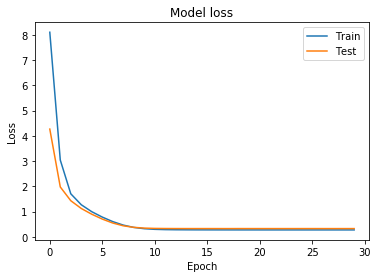

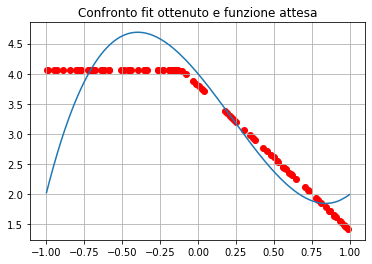

In [16]:
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3) 

sigma = 0.0 
y_train = np.random.normal( 4-3 * x_train -2*(x_train**2)+3*(x_train**3), sigma) 
y_valid = np.random.normal( 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3), sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.title("Rappresentazione dati di validation e target")
plt.grid(True); plt.show()

from tensorflow.keras.layers import Activation

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,),activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x=x_train, y=y_train, 
          batch_size=320, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title("Confronto fit ottenuto e funzione attesa")
plt.grid(True)
plt.show()

Nonostante questo fit sia ben lontano dall'essere soddisfacente, si può intuire che si sta procedendo nella giusta direzione.

Si aggiunge, allora, un ulteriore layer intermedio, subito prima di quello di output, composto di $10$ neuroni (anch'essi con funzione di attivazione relu). Si decide, inoltre, di aumentare ulteriormente i punti: se ne utilizzano $50000$ di training e $5000$ di validation. Anche il numero di epoche viene aumentato a $50$. Il rischio, in questo senso, di esagerare e di sfociare nell'overfitting, non è da trascurare. Bisogna quindi osservare attentamente il valore della loss sui dati di validation in funzione delle epoche. Finché questa non inizia a crescere in modo evidente e sistematico, si può affermare di aver scongiurato questo problema.

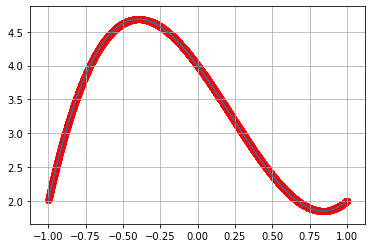

Epoch 1/50
157/157 [==============================] - 0s 2ms/step - loss: 1.1510 - val_loss: 0.5132
Epoch 2/50
157/157 [==============================] - 0s 2ms/step - loss: 0.4323 - val_loss: 0.3716
Epoch 3/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2960 - val_loss: 0.2359
Epoch 4/50
157/157 [==============================] - 0s 2ms/step - loss: 0.1619 - val_loss: 0.1119
Epoch 5/50
157/157 [==============================] - 0s 1ms/step - loss: 0.0795 - val_loss: 0.0584
Epoch 6/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0457 - val_loss: 0.0390
Epoch 7/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0289 - val_loss: 0.0239
Epoch 8/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.0162
Epoch 9/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0124
Epoch 10/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0095

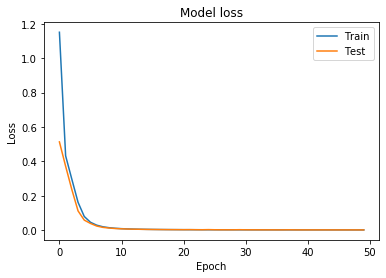

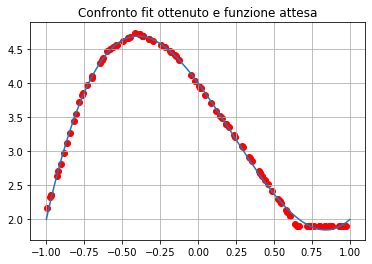

In [19]:
x_train = np.random.uniform(-1, 1, 50000)
x_valid = np.random.uniform(-1, 1, 5000)
x_valid.sort()
y_target = 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3) 

sigma = 0.0 
y_train = np.random.normal( 4-3 * x_train -2*(x_train**2)+3*(x_train**3), sigma) 
y_valid = np.random.normal( 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3), sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.title("Rappresentazione dati di validation e target")
plt.grid(True); plt.show()

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,),activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss='mse')

history = model.fit(x=x_train, y=y_train, 
          batch_size=320, epochs=50,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title("Confronto fit ottenuto e funzione attesa")
plt.grid(True)
plt.show()

Da quest'ultimo grafico e dal valore della loss sui dati di training, si può concludere che il fit ottenuto è buono. Inoltre, si può affermare di non essere incappati in overfitting.

L'unico aspetto poco convincente di questi risultati risiede nei punti di fine range: sono stati infatti tutti uniformati ad un valore apparentemente costante. Si prova, di conseguenza, ad utilizzare la SELU come funzione di attivazione.

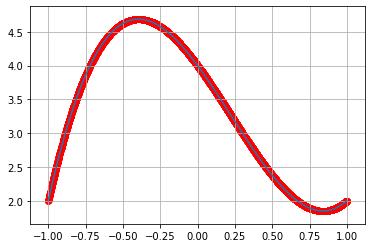

Epoch 1/50
157/157 [==============================] - 0s 2ms/step - loss: 0.4784 - val_loss: 0.2771
Epoch 2/50
157/157 [==============================] - 0s 2ms/step - loss: 0.2303 - val_loss: 0.1790
Epoch 3/50
157/157 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.0981
Epoch 4/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0765 - val_loss: 0.0622
Epoch 5/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0446
Epoch 6/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0359 - val_loss: 0.0283
Epoch 7/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0255 - val_loss: 0.0230
Epoch 8/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.0201
Epoch 9/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0174
Epoch 10/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.0155

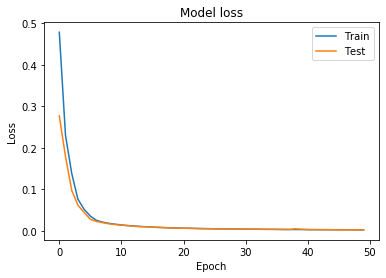

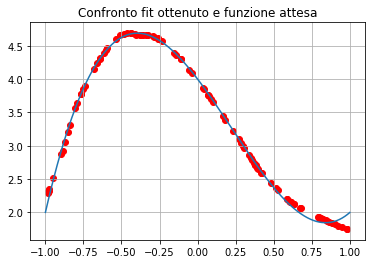

In [20]:
x_train = np.random.uniform(-1, 1, 50000)
x_valid = np.random.uniform(-1, 1, 5000)
x_valid.sort()
y_target = 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3) 

sigma = 0.0 
y_train = np.random.normal( 4-3 * x_train -2*(x_train**2)+3*(x_train**3), sigma) 
y_valid = np.random.normal( 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3), sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.title("Rappresentazione dati di validation e target")
plt.grid(True); plt.show()

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,),activation='selu'))
model.add(Dense(40,activation='selu'))
model.add(Dense(10,activation='selu'))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss='mse')

history = model.fit(x=x_train, y=y_train, 
          batch_size=320, epochs=50,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score)

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title("Confronto fit ottenuto e funzione attesa")
plt.grid(True)
plt.show()

Si ottiene, alla fine delle $50$ epoche, una loss leggermente superiore alla precedente. Tuttavia, questo modello appare leggermente più adeguato: il problema con i punti di fine range è stato notevolmente ridimensionato. Ci si attende, quindi, che questo fit sia più stabile nel momento in cui si introduce del rumore nei dati. 

Ponendo $\sigma=0.2$, si sono aumentate anche le epoche a $100$ e si sono ottenuti i seguenti risultati:

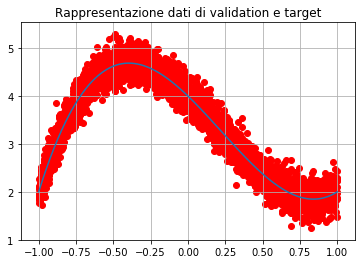

Epoch 1/100
157/157 [==============================] - 0s 3ms/step - loss: 0.6085 - val_loss: 0.3312
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2813 - val_loss: 0.2201
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1800 - val_loss: 0.1384
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1159 - val_loss: 0.0977
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0881 - val_loss: 0.0809
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0745 - val_loss: 0.0693
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0667 - val_loss: 0.0671
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0634 - val_loss: 0.0630
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0609 - val_loss: 0.0598
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0589 - val_lo

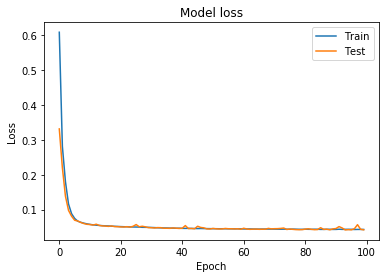

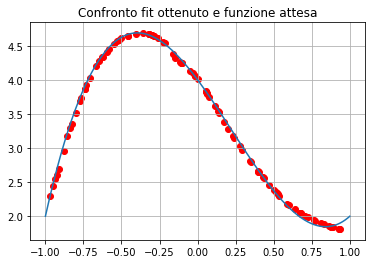

In [23]:
x_train = np.random.uniform(-1, 1, 50000)
x_valid = np.random.uniform(-1, 1, 5000)
x_valid.sort()
y_target = 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3) 

sigma = 0.2 
y_train = np.random.normal( 4-3 * x_train -2*(x_train**2)+3*(x_train**3), sigma) 
y_valid = np.random.normal( 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3), sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.title("Rappresentazione dati di validation e target")
plt.grid(True); plt.show()

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,),activation='selu'))
model.add(Dense(40,activation='selu'))
model.add(Dense(10,activation='selu'))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss='mse')

history = model.fit(x=x_train, y=y_train, 
          batch_size=320, epochs=100,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss (con y_valid):', score)

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss (con y_target):', score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title("Confronto fit ottenuto e funzione attesa")
plt.grid(True)
plt.show()

I risultati ottenuti sono ancora molto soddisfacenti. Come nel caso del fit lineare, la loss ottenuta con i dati di validation è inevitabilmente cresciuta, mentre quella derivante dai target è pressoché identica a quella precedente.

A questo punto si cerca di capire se il fit si mantiene adeguato anche fuori dall'intervallo $[-1;1]$. Dopo aver allenato l'intelligenza artificiale con dati nell'usuale range, le si richiedono delle predizioni con valori di $x\in[-2;2]$. Queste vengono confrontate con i dati target esatti calcolati tramite dalla $f(x)$.  

Epoch 1/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6502 - val_loss: 0.3742
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.3171 - val_loss: 0.2524
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1960 - val_loss: 0.1482
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1186 - val_loss: 0.0961
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0843 - val_loss: 0.0764
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0703 - val_loss: 0.0665
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0639 - val_loss: 0.0619
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0586
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0567
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0557 - val_lo

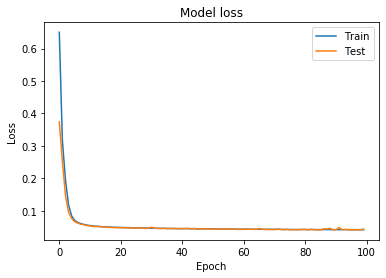

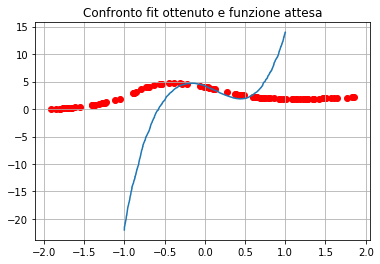

In [24]:
x_train = np.random.uniform(-1, 1, 50000)
x_valid = np.random.uniform(-1, 1, 5000)
x_valid.sort()
x_target= np.random.uniform(-2, 2, 5000)
x_target.sort()
y_target = 4-3 * x_target -2*(x_target**2)+3*(x_target**3) 

sigma = 0.2 
y_train = np.random.normal( 4-3 * x_train -2*(x_train**2)+3*(x_train**3), sigma)
y_valid = np.random.normal( 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3), sigma)



model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,),activation='selu'))
model.add(Dense(40,activation='selu'))
model.add(Dense(10,activation='selu'))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss='mse')

history = model.fit(x=x_train, y=y_train, 
          batch_size=320, epochs=100,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss (con y_valid):', score)

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss (con y_target):', score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title("Confronto fit ottenuto e funzione attesa")
plt.grid(True)
plt.show()

I risultati non sono per niente soddisfacenti: la loss con i dati target è enorme e l'ultimo grafico mostra chiaramente il fallimento. Si conclude quindi che l'intelligenza artificiale produrrà dei buoni fit solo nel range dei dati con cui è stata addestrata.

Tornando a considerare solo il range $[-1;1]$, si prova ora ad utilizzare un'altra funzione loss: nel prossimo esempio, anziché il mean squared error, si utilizzerà il mean absolute error. Le due sono piuttosto simili, di conseguenza è lecito attendersi dei risultati molto simili ai casi precedenti

Epoch 1/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6529 - val_loss: 0.4316
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.3967 - val_loss: 0.3632
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.3039 - val_loss: 0.2638
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2421 - val_loss: 0.2294
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2163 - val_loss: 0.2199
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2002 - val_loss: 0.1973
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1912 - val_loss: 0.1888
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1852 - val_loss: 0.1834
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1803 - val_loss: 0.1814
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1766 - val_lo

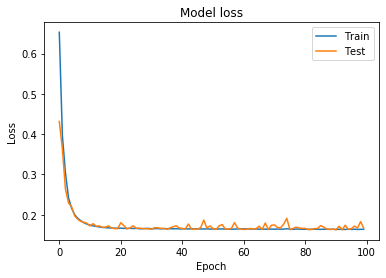

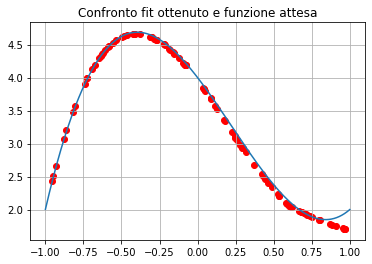

In [26]:
x_train = np.random.uniform(-1, 1, 50000)
x_valid = np.random.uniform(-1, 1, 5000)
x_valid.sort()
y_target = 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3) 

sigma = 0.2 
y_train = np.random.normal( 4-3 * x_train -2*(x_train**2)+3*(x_train**3), sigma) 
y_valid = np.random.normal( 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3), sigma)



model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,),activation='selu'))
model.add(Dense(40,activation='selu'))
model.add(Dense(10,activation='selu'))
model.add(Dense(1,))

model.compile(optimizer='sgd', loss='mae')

history = model.fit(x=x_train, y=y_train, 
          batch_size=320, epochs=100,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss (con y_valid):', score)

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss (con y_target):', score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title("Confronto fit ottenuto e funzione attesa")
plt.grid(True)
plt.show()

Come previsto, con il MAE, cambiano i valori numerici delle loss nelle varie epoche, ma i risultati finali sono quasi totalmente indistinguibili da quelli precedenti.

Infine, si modifica anche l'ottimizzatore: anziché lo stocastic gradient descent si prova ad utilizzare l'ADAGRAD.

Epoch 1/100
157/157 [==============================] - 0s 2ms/step - loss: 2.9613 - val_loss: 2.6990
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 2.4519 - val_loss: 2.2226
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 1.9805 - val_loss: 1.7791
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 1.6071 - val_loss: 1.4595
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 1.3112 - val_loss: 1.1888
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0688 - val_loss: 0.9732
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.8787 - val_loss: 0.8051
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.7336 - val_loss: 0.6774
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6278 - val_loss: 0.5864
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.5562 - val_lo

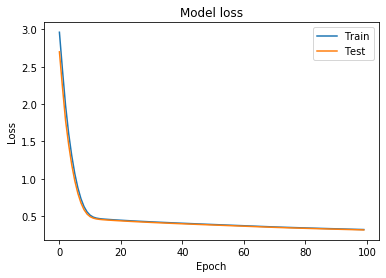

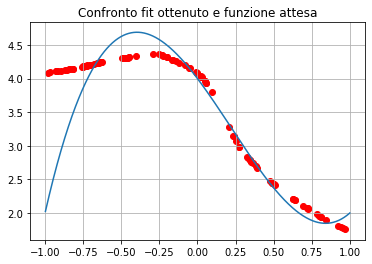

In [35]:

x_train = np.random.uniform(-1, 1, 50000)
x_valid = np.random.uniform(-1, 1, 5000)
x_valid.sort()
y_target = 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3) 

sigma = 0.2 
y_train = np.random.normal( 4-3 * x_train -2*(x_train**2)+3*(x_train**3), sigma) 
y_valid = np.random.normal( 4-3 * x_valid -2*(x_valid**2)+3*(x_valid**3), sigma)


model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,),activation='selu'))
model.add(Dense(40,activation='selu'))
model.add(Dense(10,activation='selu'))
model.add(Dense(1,))

model.compile(optimizer='adagrad', loss='mae')

history = model.fit(x=x_train, y=y_train, 
          batch_size=320, epochs=100,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss (con y_valid):', score)

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss (con y_target):', score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title("Confronto fit ottenuto e funzione attesa")
plt.grid(True)
plt.show()

Si ricavano, con ADAGRAD, dei risultati molto peggiori. Probabilmente, modificando in modo opportuno i suoi parametri, si sarebbe potuto ottenere qualcosa di meglio. In ogni caso, la conclusione è che, quindi, la scelta dell'ottimizzatore non è banale: non tutti si equivalgono ed è importante scegliere, ogni volta, quello più adeguato. 

## <span style="color:blue">ESERCIZIO 11.3</span>

Per fittare la funzione di più variabili, si sono utilizzati, anche in questo caso, $50000$ dati di training e $5000$ di validation. Ovviamente ciascun dato è ora costituito da una coppia di numeri. Anche il numero di epoche è stato tenuto pari a $100$. 

La struttura dei layer è simile a quella dell'esercizio precedente, l'unica differenza è che il primo layer è costituito da $10$ neuroni, anziché da uno solo. Si è presa questa decisione a seguito di numerosi tentativi; in questo modo, infatti, si raggiungevano i valori di loss più bassi. A parte quello di output, tutti i neuroni sono attivati tramite la funzione SELU. 

La loss è tornata ad essere calcolata con la classica mean squared error e si è utilizzato lo SGD come ottimizzatore. In questo caso, però, è stato necessario settare la learning rate a $0.005$. Con il valore impostato di default, infatti, si ottenevano strani andamenti della loss al variare delle epoche, sia con i dati di validation che con quelli di training. La MSE subiva forti oscillazioni tra un'epoca e la successiva. Ciò è facilmente spiegabile: questi grafici sono estremamente frequenti quando si adoperano passi troppo grandi nella ricerca del minimo con tecniche di discesa del gradiente.  

Questi sono stati i risultati ottenuti (con $\sigma=0$):

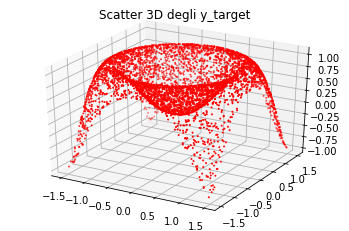

Epoch 1/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1680 - val_loss: 0.1390
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1312 - val_loss: 0.1284
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1225 - val_loss: 0.1207
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1154 - val_loss: 0.1136
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1094 - val_loss: 0.1078
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1040 - val_loss: 0.1025
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0994 - val_loss: 0.0980
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0953 - val_loss: 0.0954
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0918 - val_loss: 0.0906
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0886 - val_lo

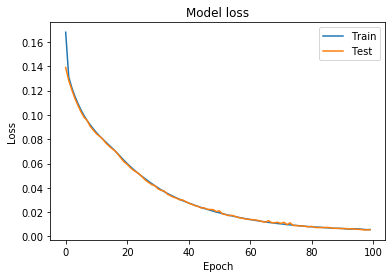

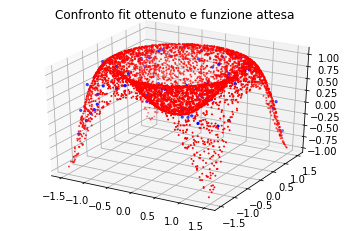

In [37]:
from tensorflow.keras.optimizers import SGD
from mpl_toolkits import mplot3d

n_train=50000
n_valid=5000
y_target = np.zeros(n_valid)
x_train=np.zeros((n_train,2))
x_valid=np.zeros((n_valid,2))
y_valid = np.zeros(n_valid)
y_train = np.zeros(n_train)


x_draw=np.zeros(n_valid)
y_draw=np.zeros(n_valid)



sigma = 0.0 

for i in range(n_valid):
    x_valid[i][0]=np.random.uniform(-3/2,3/2)
    x_valid[i][1]=np.random.uniform(-3/2,3/2)
    y_target[i]=np.sin(x_valid[i][0]**2+x_valid[i][1]**2)
    y_valid[i]=np.random.normal(np.sin(x_valid[i][0]**2+x_valid[i][1]**2) , sigma)
    x_draw[i]=x_valid[i][0]
    y_draw[i]=x_valid[i][1]
    
for i in range(n_train):
    x_train[i][0]=np.random.uniform(-3/2,3/2)
    x_train[i][1]=np.random.uniform(-3/2,3/2)
    y_train[i]=np.random.normal(np.sin(x_train[i][0]**2+x_train[i][1]**2) , sigma)
    
ax = plt.axes(projection='3d')
plt.title("Scatter 3D degli y_target")
ax.scatter3D(xs=x_draw,ys=y_draw,zs=y_target, color='r',s=1)
plt.show()

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(2,),activation='selu'))
model.add(Dense(40,activation='selu'))
model.add(Dense(20,activation='selu'))
model.add(Dense(1,))
model.compile(optimizer=SGD(lr=0.005), loss='mse')

history = model.fit(x=x_train, y=y_train, 
          batch_size=320, epochs=100,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score)

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


ax = plt.axes(projection='3d')
x_predicted=np.zeros((100,2))
x_draw_pred=np.zeros(100)
y_draw_pred=np.zeros(100)

for i in range(100):
    x_predicted[i][0]=np.random.uniform(-3/2,3/2)
    x_predicted[i][1]=np.random.uniform(-3/2,3/2)
    x_draw_pred[i]=x_predicted[i][0]
    y_draw_pred[i]=x_predicted[i][1]
    
y_predicted = model.predict(x_predicted)

ax.scatter3D(xs=x_draw,ys=y_draw,zs=y_target, color='r',s=1)
ax.scatter3D(xs=x_draw_pred,ys=y_draw_pred,zs=y_predicted, color='b',s=5)
plt.title("Confronto fit ottenuto e funzione attesa")
plt.show()

Nell'ultimo grafico si possono confrontare i puntini blu (calcolati con i parametri ottimizzati dell'intelligenza artificiali) con quelli rossi (calcolati in modo esatto con la funzione $f(x,y)$). 

Nel complesso si può essere soddisfatti di questi risultati. Qualitativamente, infatti, i puntini blu sembrano piuttosto vicini a quelli rossi. Inoltre la loss finale ottenuta è comparabile con quelle dell'esercizio precedente. 

Per concludere, anche in questo esercizio si introduce del rumore gaussiano nei dati ($\sigma=0.2$). 

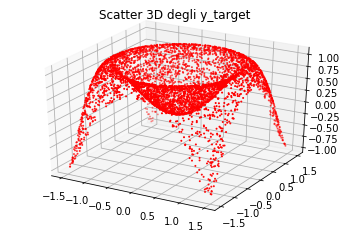

Epoch 1/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2283 - val_loss: 0.1857
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1810 - val_loss: 0.1723
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1682 - val_loss: 0.1608
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1576 - val_loss: 0.1517
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1440
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1382
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1321
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1310 - val_loss: 0.1280
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1264 - val_loss: 0.1232
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1220 - val_lo

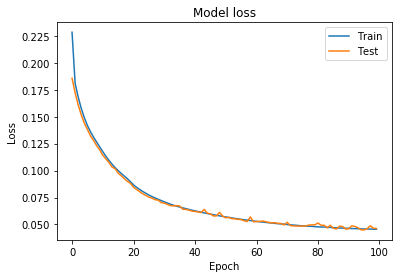

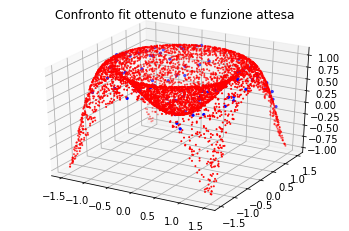

In [39]:
from mpl_toolkits import mplot3d

n_train=50000
n_valid=5000
y_target = np.zeros(n_valid)
x_train=np.zeros((n_train,2))
x_valid=np.zeros((n_valid,2))
y_valid = np.zeros(n_valid)
y_train = np.zeros(n_train)


x_draw=np.zeros(n_valid)
y_draw=np.zeros(n_valid)



sigma = 0.2 

for i in range(n_valid):
    x_valid[i][0]=np.random.uniform(-3/2,3/2)
    x_valid[i][1]=np.random.uniform(-3/2,3/2)
    y_target[i]=np.sin(x_valid[i][0]**2+x_valid[i][1]**2)
    y_valid[i]=np.random.normal(np.sin(x_valid[i][0]**2+x_valid[i][1]**2) , sigma)
    x_draw[i]=x_valid[i][0]
    y_draw[i]=x_valid[i][1]
    
for i in range(n_train):
    x_train[i][0]=np.random.uniform(-3/2,3/2)
    x_train[i][1]=np.random.uniform(-3/2,3/2)
    y_train[i]=np.random.normal(np.sin(x_train[i][0]**2+x_train[i][1]**2) , sigma)
    
ax = plt.axes(projection='3d')
ax.scatter3D(xs=x_draw,ys=y_draw,zs=y_target, color='r',s=1)
plt.title("Scatter 3D degli y_target")
plt.show()

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(2,),activation='selu'))
model.add(Dense(40,activation='selu'))
model.add(Dense(20,activation='selu'))
model.add(Dense(1,))
model.compile(optimizer=SGD(lr=0.004), loss='mse')

history = model.fit(x=x_train, y=y_train, 
          batch_size=320, epochs=100,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss (con y_valid):', score)

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss (con y_target):', score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


ax = plt.axes(projection='3d')
x_predicted=np.zeros((100,2))
x_draw_pred=np.zeros(100)
y_draw_pred=np.zeros(100)

for i in range(100):
    x_predicted[i][0]=np.random.uniform(-3/2,3/2)
    x_predicted[i][1]=np.random.uniform(-3/2,3/2)
    x_draw_pred[i]=x_predicted[i][0]
    y_draw_pred[i]=x_predicted[i][1]
    
y_predicted = model.predict(x_predicted)

ax.scatter3D(xs=x_draw,ys=y_draw,zs=y_target, color='r',s=1)
ax.scatter3D(xs=x_draw_pred,ys=y_draw_pred,zs=y_predicted, color='b',s=5)
plt.title("Confronto fit ottenuto e funzione attesa")

plt.show()

Come nel fit lineare e in quello polinomiale, la loss ottenuta con i dati di validation è diventata più grande a causa della presenza di $\sigma$. Quella calcolata con i target, invece, rimane paragonabile a quella precedente, valutata senza rumore nei dati. Inoltre, i puntini blu nel grafico risultano visivamente compatibili con quelli rossi. Si può dunque concludere di essere riusciti a fittare in modo soddisfacente anche una funzione di più variabili.